In [128]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Bank_Personal_Loan_Modelling-1.csv')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [131]:
scaler = StandardScaler()
cols_to_scale = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [132]:
df_scaled[cols_to_scale].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-2.131628e-18,-1.179501e-16,-5.613288e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [136]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled[cols_to_scale])
df_scaled['Cluster'] = kmeans.predict(df_scaled[cols_to_scale])

In [142]:
# Using PCA on the scaled columns, create two new columns, pc1 and pc2, 
# containing the data for PC1 and PC2 respectively
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(df_scaled[cols_to_scale])

In [144]:
df_scaled['pc1'] = pca_res[:, 0]
df_scaled['pc2'] = pca_res[:, 1]

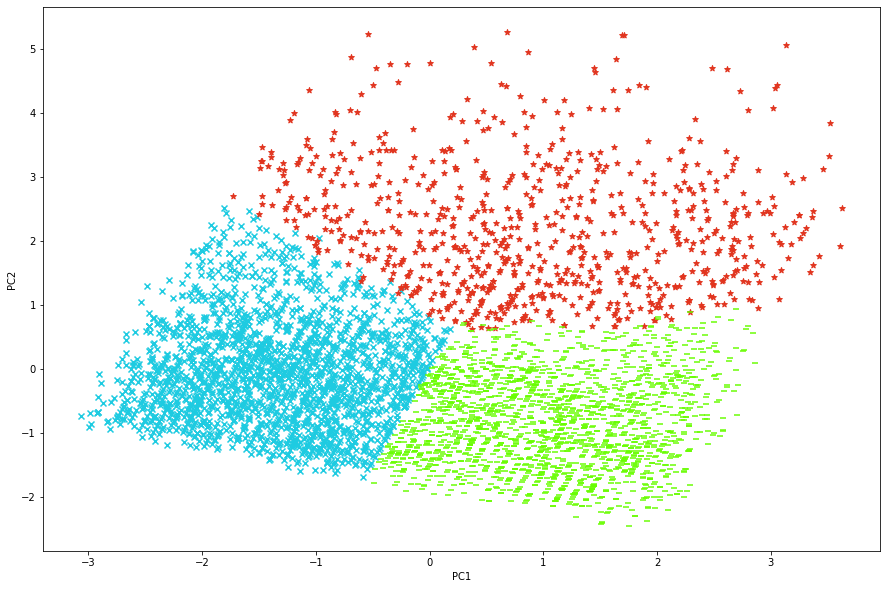

In [153]:
markers = ['x', '*', '_']
color= ['#1ecbe1', '#E1341E', '#69FD02']
plt.figure(figsize=(15, 10))
for clust in range(3):
    # creating temporary dataframe
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
    label="Cluster "+str(clust), \
    color=color[clust])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

SO the total process comes down to this,  
1) Scale the scalable columns 
2) Fit and transform the new scaled columns over the new columns in a duplicate dataframe.  
3) Create clusters for these SCALED data points, and add the 'Cluster' column to the scaled dataframe  
4) Now we perform principal component analysis for dimensionality reduction, and we do this by 'fit_transform'ing the columns to the required ones and then getting the result in a pca_results dataframe.  
5) We use this dataframe to get the pc1 and pc2 columns which gets added to the df_scaled dataframe and then these columns are used as the x and y axis to visualize the clusters by using the pre assigned clusters as a legend  